<a href="https://colab.research.google.com/github/alanabates/EDA-and-Predictive-Analytics-in-Python/blob/main/Final_Bates_Alana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With what information does Bayes Theorem update our previous knowledge about the data parameters?

**Answer:** Bayes Theorem develops the likelihood of an event occurring called a posterior probability based on data. The theorem states that an intital belief (the prior probability) can be improve upon with new data to come to an improved belief (posterior probability). 

What does the prior probability represent?

**Answer:** The prior probability is the initial probability of an event occuring before new data is collected. Thus, the prior probability represents the basis assessment and probability of a particular outcome based on existing knowledge held before an experiment is performed.

For the following exercises, work with the wine_flag_training and wine_flag_test data sets. Use either Python or R (or Excel) to solve each problem.

Here are the links to the datasets:

https://raw.githubusercontent.com/jjghockey/DESC624/main/wine_flag_test.csv

https://raw.githubusercontent.com/jjghockey/DESC624/main/wine_flag_training.csv

Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag.  
Use the tables in the previous exercise to calculate: 
* The prior probability of Type = Red and Type = White.
* The probability of high and low alcohol content.
* The probability of high and low sugar content. 
* The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red). 
* The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White). 
* The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red). 
* The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).

Use the probabilities in the previous exercise to discuss 
* How likely it is that a randomly selected wine is red. 
* How likely it is that a randomly selected wine has a high alcohol content. 
* How likely it is that a randomly selected wine has a low sugar content. 

Use the conditional probabilities found earlier to discuss 
* What a typical white wine might have as its alcohol and sugar content. 
* What a typical red wine might have as its alcohol and sugar content. 

Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine. 

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. What would the Naïve Bayes classifier classify this wine as?

Compute the posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content. Compute the posterior probability of Type = White for the same wine. 
Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content. 

Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

According to your table in the previous exercise, find the following values for the Naïve Bayes model:
* Accuracy
* Error rate

According to your contingency table, find the following values for the Naïve Bayes model:
* How often it correctly classifies red wines.
* How often it correctly classifies white wines.

In [ ]:
#Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import numpy as np 
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

In [ ]:
#Installing python datatable
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Python h2o-  the Machine Learning package we will be using.

!apt-get install default-jre
!java -version

! pip install h2o

#import h2o

#h2o.init()
#h2o.shutdown()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Loading Data in Python
winetrain_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/wine_flag_training.csv")
winetrain_p.head()

,Type,Alcohol_flag,Sugar_flag
,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
5,Red,Low,Low
6,Red,High,Low
7,Red,Low,Low
8,Red,Low,Low


In [ ]:
winetest_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/wine_flag_test.csv")
winetest_p.head()

,Type,Alcohol_flag,Sugar_flag
,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,Red,Low,Low
1,Red,Low,Low
2,Red,Low,Low
3,Red,Low,Low
4,Red,Low,Low
5,Red,Low,Low
6,Red,Low,Low
7,Red,Low,Low
8,Red,Low,Low


In [ ]:
winetrain_pd=winetrain_p.to_pandas()

In [ ]:
winetrain_p=dt.Frame(winetrain_pd)

In [ ]:
winetrain_pd.head()

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


In [ ]:
winetest_pd=winetest_p.to_pandas()
winetest_p=dt.Frame(winetest_pd)
winetest_pd.head()

,Type,Alcohol_flag,Sugar_flag
0,Red,Low,Low
1,Red,Low,Low
2,Red,Low,Low
3,Red,Low,Low
4,Red,Low,Low


In [ ]:
winetrain_p[:,'count']=1
winetrain_p[:, sum(f.count), by('Type')]

,Type,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Red,500
1,White,500


In [ ]:
winetest_p[:,'count']=1
winetest_p[:, sum(f.count), by('Type')]

,Type,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Red,585
1,White,1760


Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag. Use the tables in the previous exercise to calculate:

The prior probability of Type = Red and Type = White. The probability of high and low alcohol content. The probability of high and low sugar content. 

**Answer:** The prior probability of Type = Red is 50% and the prior probability of Type = White is 50% as shown by the contigency table below. The probability of high alcohol content is 48.6% and the probability of low alcohol content is 51.4%. The probability of high sugar content is 41.6% and the probability of low sugar content is 58.4%. All of my code is shown below. 

In [ ]:
# Contigency Table (Type and Alcohol_flag) 
alch = pd.crosstab(index=winetrain_pd["Alcohol_flag"],columns="Count", normalize='columns')
Type = pd.crosstab(index=winetrain_pd["Type"],columns="Count", normalize='columns')

print(alch)
print(Type)

col_0         Count
Alcohol_flag       
High          0.486
Low           0.514
col_0  Count
Type        
Red      0.5
White    0.5


In [ ]:
# Contigency Table (Type and Alcohol_flag)
ct_n = pd.crosstab(index=winetrain_pd["Alcohol_flag"],columns=winetrain_pd["Type"], normalize='columns')
out_wcc = pd.crosstab(index=winetrain_pd["Type"],columns=winetrain_pd["Alcohol_flag"], normalize='columns')
print(ct_n)
print(out_wcc)

Type            Red  White
Alcohol_flag              
High          0.436  0.536
Low           0.564  0.464
Alcohol_flag     High       Low
Type                           
Red           0.44856  0.548638
White         0.55144  0.451362


In [ ]:
# Contigency Table (Type and Sugar_flag)
sugar = pd.crosstab(index=winetrain_pd["Sugar_flag"],columns="Count", normalize='columns')
Type = pd.crosstab(index=winetrain_pd["Type"],columns="Count", normalize='columns')

print(sugar)
print(Type)


col_0       Count
Sugar_flag       
High        0.416
Low         0.584
col_0  Count
Type        
Red      0.5
White    0.5


In [ ]:
# Contigency Table (Type and Sugar_flag)
sugar_type = pd.crosstab(index=winetrain_pd["Sugar_flag"],columns=winetrain_pd["Type"], normalize='columns')
type_sugar = pd.crosstab(index=winetrain_pd["Type"],columns=winetrain_pd["Sugar_flag"], normalize='columns')

print(sugar_type)
print(type_sugar)

Type          Red  White
Sugar_flag              
High        0.232    0.6
Low         0.768    0.4
Sugar_flag      High       Low
Type                          
Red         0.278846  0.657534
White       0.721154  0.342466


The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White). 

(Probability of low alcohol content give wine type is white). 

**Answer:** The conditional probability of alcohol content being high given that the type of wine is red is 43.6% and the conditional probability of alcohol content being low given that the type of wines is red is 56.4%. The conditional probability of alcohol content being high given that the type of wine is white is 53.6% and the conditional probability of alcohol content being low given that the type of wine is white is 46.6%. All code used to answer this question is provided above. 

The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red). The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).

**Answer:** The conditional probability of sugar content being high given that the type of wine is red is 23.2% as shown by the code above. The conditional probability of sugar content being low given that the type of wine is red is 76.8%. The conditional probability of sugar content being high given that the type of wine is white is 60% and the conditional probability of sugar content being low given that the type of wine is white is 40%. All code is shown above. 

Use the probabilities in the previous exercise to discuss
* How likely it is that a randomly selected wine is red.
* How likely it is that a randomly selected wine has a high alcohol content.
* How likely it is that a randomly selected wine has a low sugar content.

**Answer:** There is a 50% chance that a randomly selected wine is red which means that it is somewhat likely. Since there is a 48.6% probability that a randomly selected wine has a high alcohol content it is more likely that a randomly selected wine have a low alcohol content, but only by a small margin. Additionally, it is likely that a randomly selected wine has a low sugar content as the prior probability for a wine having a low sugar content it 58.4%. 

Use the conditional probabilities found earlier to discuss
* What a typical white wine might have as its alcohol and sugar content.
* What a typical red wine might have as its alcohol and sugar content.

**Answer:** A typical white wine based on the conditional probabilities calculated previously will have a high alcohol content and a high sugar content. A typical red white might have a low alcohol content and low sugar content based on the previously calculated conditional probabilties shown above.

Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

Alcohol_flag   High    Low
Type                      
Red           0.436  0.564
White         0.536  0.464


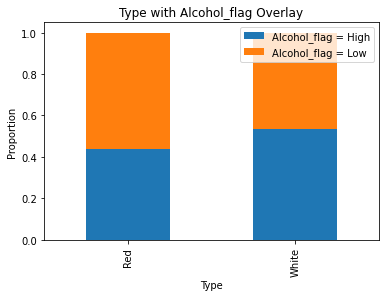

In [ ]:
#Plot 1
winetrain_pd=winetrain_p.to_pandas()
crosstab_01 = pd.crosstab(winetrain_pd['Type'], winetrain_pd['Alcohol_flag'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Alcohol_flag = High', 'Alcohol_flag = Low'])
plt.title('Type with Alcohol_flag Overlay')
plt.xlabel('Type'); plt.ylabel('Proportion'); plt.show()

Sugar_flag   High    Low
Type                    
Red         0.232  0.768
White       0.600  0.400


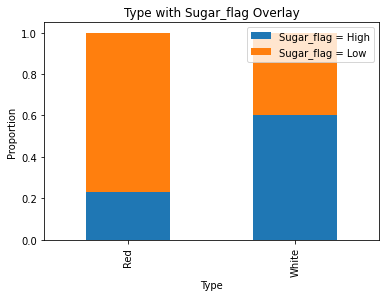

In [ ]:
#Plot 2
winetrain_pd=winetrain_p.to_pandas()
crosstab_01 = pd.crosstab(winetrain_pd['Type'], winetrain_pd['Sugar_flag'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Sugar_flag = High', 'Sugar_flag = Low'])
plt.title('Type with Sugar_flag Overlay')
plt.xlabel('Type'); plt.ylabel('Proportion'); plt.show()

Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. What would the Naïve Bayes classifier classify this wine as?

**Answer:** The code that I used to compute the posterior probabilities is shown below. A wine with a low alcohol and high sugar content would most likely be a white wine as the posterior probability of a wine being a white wine given that it has a low alcohol content and high sugar content is 71.86% and the posterior probability of a wine being a red wine given that it has a low alcohol content and high sugar content is 28.14%. Thus, the Naïve Bayes classifier would classify a wine with low alcohol and high sugar content as a white wine.

In [ ]:
# Posterior probability of Type = Red for a wine with low alcohol content and high sugar content 
winetrain_pd['val']=1
alch_sugar_type=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='Low') & (winetrain_pd['Sugar_flag']=='High') & (winetrain_pd['Type']=="Red")]
alch_sugar=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='Low') & (winetrain_pd['Sugar_flag']=='High')]
winetype=winetrain_pd[ (winetrain_pd['Type']=="Red")]

pBA=alch_sugar_type['val'].sum()/winetype['val'].sum()
pA=winetype['val'].sum()/winetrain_pd['val'].sum()
pB=alch_sugar['val'].sum()/winetrain_pd['val'].sum()

print(pBA)
print(pA)
print(pB)

pAB=(pBA*pA)/pB
print(pAB)

0.13
0.5
0.231
0.2813852813852814


In [ ]:
# Posterior probability of Type = White for a wine with low alcohol content and high sugar content 
winetrain_pd['val']=1
alch_sugar_type=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='Low') & (winetrain_pd['Sugar_flag']=='High') & (winetrain_pd['Type']=="White")]
alch_sugar=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='Low') & (winetrain_pd['Sugar_flag']=='High')]
winetype=winetrain_pd[ (winetrain_pd['Type']=="Red")]

pBA=alch_sugar_type['val'].sum()/winetype['val'].sum()
pA=winetype['val'].sum()/winetrain_pd['val'].sum()
pB=alch_sugar['val'].sum()/winetrain_pd['val'].sum()

print(pBA)
print(pA)
print(pB)

pAB=(pBA*pA)/pB
print(pAB)

0.332
0.5
0.231
0.7186147186147186


Compute the posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

**Answer:** The code that I used to calculate the posterior probabilities is shown below. A red wine is more probable for a wine with a high alcohol and low sugar content. This is because the posterior probability for wine being a red wine given that it has high alcohol and low sugar content is 55.48% whereas the posterior probability of a wine being a white wine given that it has a high alcohol content and low sugar is 44.52%. Thus, the Naïve Bayes classifier would classify a wine with a high alcohol and low sugar content as a red wine.

In [ ]:
# Posterior probability of Type = Red for a wine with high alcohol content and low sugar content 
winetrain_pd['val']=1
alch_sugar_type=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='High') & (winetrain_pd['Sugar_flag']=='Low') & (winetrain_pd['Type']=="Red")]
alch_sugar=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='High') & (winetrain_pd['Sugar_flag']=='Low')]
winetype=winetrain_pd[ (winetrain_pd['Type']=="Red")]

pBA=alch_sugar_type['val'].sum()/winetype['val'].sum()
pA=winetype['val'].sum()/winetrain_pd['val'].sum()
pB=alch_sugar['val'].sum()/winetrain_pd['val'].sum()

print(pBA)
print(pA)
print(pB)

pAB=(pBA*pA)/pB
print(pAB)

0.334
0.5
0.301
0.5548172757475084


In [ ]:
# Posterior probability of Type = White for a wine with high alcohol content and low sugar content 
winetrain_pd['val']=1
alch_sugar_type=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='High') & (winetrain_pd['Sugar_flag']=='Low') & (winetrain_pd['Type']=="White")]
alch_sugar=winetrain_pd[ (winetrain_pd['Alcohol_flag']=='High') & (winetrain_pd['Sugar_flag']=='Low')]
winetype=winetrain_pd[ (winetrain_pd['Type']=="White")]

pBA=alch_sugar_type['val'].sum()/winetype['val'].sum()
pA=winetype['val'].sum()/winetrain_pd['val'].sum()
pB=alch_sugar['val'].sum()/winetrain_pd['val'].sum()

print(pBA)
print(pA)
print(pB)

pAB=(pBA*pA)/pB
print(pAB)

0.268
0.5
0.301
0.4451827242524917


Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content.

In [ ]:
# Creating a dataframe
winetrain_pd = winetrain_p.to_pandas()
winetest_pd = winetest_p.to_pandas()
  
# Converting variables to factor variables for modeling
winetrain_pd['Type'],_=pd.factorize(winetrain_pd['Type'], sort=True)
winetrain_pd['Alcohol_flag'],_=pd.factorize(winetrain_pd['Alcohol_flag'], sort=True)
winetrain_pd['Sugar_flag'],_=pd.factorize(winetrain_pd['Sugar_flag'], sort=True)
winetest_pd['Type'],_=pd.factorize(winetest_pd['Type'], sort=True)
winetest_pd['Alcohol_flag'],_=pd.factorize(winetest_pd['Alcohol_flag'], sort=True)
winetest_pd['Sugar_flag'],_=pd.factorize(winetest_pd['Sugar_flag'], sort=True)

# Training and Test Split

winetrain_pd_trn = winetrain_pd 

winetest_pd_tst = winetest_pd

winetest_pd_tst.describe()

,Type,Alcohol_flag,Sugar_flag,count
count,2345.000000,2345.000000,2345.000000,2345.0
mean,0.750533,0.498934,0.486994,1.0
std,0.432797,0.500106,0.499937,0.0
min,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.0


In [ ]:
trn=winetrain_pd_trn.loc[:,['Type','Alcohol_flag','Sugar_flag']]
tst=winetest_pd_tst.loc[:,['Type','Alcohol_flag','Sugar_flag']]

In [ ]:
X_train = trn[['Alcohol_flag','Sugar_flag']] #predictors

y_train = trn[['Type']] #target


X_test = tst[['Alcohol_flag','Sugar_flag']] #predictors

y_test= tst[['Type']] #target

In [ ]:
# Running the Model
NB = GaussianNB()
nb_01 = NB.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predictions
prediction = nb_01.predict(X_test) #  Run Predictions

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

y=y_test.loc[:,['Type']]

fpr, tpr, thresholds = metrics.roc_curve(y, prediction)
accuracy_score(y, prediction)

0.6592750533049041

In [ ]:
#AUC
metrics.auc(fpr, tpr)

0.7039675602175604

In [ ]:
#Confusion Matrix
y_predict = pd.DataFrame(prediction,index = y_test.index, columns = ['predict'])
cm_nb = confusion_matrix(y_test, y_predict)
cm_nb_df = pd.DataFrame(cm_nb)
cm_nb_df

,0,1
0,464,121
1,678,1082


In [ ]:
b = pd.crosstab(index= y_test.index, columns=['predict'], margins = True)
a = pd.crosstab(index= y_test.index,columns= count, normalize='columns')
print(b)
print(a)


col_0  predict   All
row_0               
0            1     1
1            1     1
2            1     1
3            1     1
4            1     1
...        ...   ...
2341         1     1
2342         1     1
2343         1     1
2344         1     1
All       2345  2345

[2346 rows x 2 columns]
col_0  <function count at 0x7f11d64d5830>
row_0                                    
0                                0.000426
1                                0.000426
2                                0.000426
3                                0.000426
4                                0.000426
...                                   ...
2340                             0.000426
2341                             0.000426
2342                             0.000426
2343                             0.000426
2344                             0.000426

[2345 rows x 1 columns]


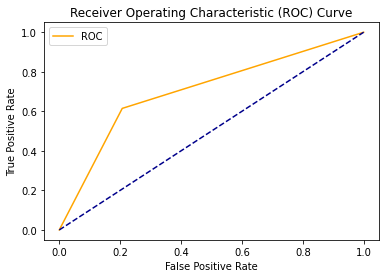

In [ ]:
#ROC Curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

Describe the following algorithms. How do they work?  What are the advantages and disadvantages of each? What type of problem is each algorithm good at, bad at):

1. CART
2. Random Forest
3. Logistic Regression
4. Neural Net
5. Gradient Boosted Machines

**Answer:** 
  CART stands for classification and regression trees, tree-based and rule-based models, and is the algorithm that forms the basis of the random forest algorithm. With CART, models that are tree-based consist of one or more if-then statements for the predictors that partition the data. Some of the advantages to CART is that the set of conditions that are generated can be easily implemented and interpretable by the user. CART models can also effectively handle numerous predictor types without the need to preprocess them. The disadvantages of CART are that the models can have instability and they provide a subpar predictive performance compared to other models. 
  
The random forest algorithm uses bootstrapped aggregration to grow numerous trees using a boostrapped sample of the observations and the variables. While random forests effectively address many of the disavantages of CART, random forest models are extremely resource intensive, which can be a particular issue with larger datasets. 

A logsitic regression is a type of generalized linear model that assumes a link function called a logit to properly model the data to make up for the lack of a linear relationship. The advantages of logistic regression are that it is the best unbiased estimator for binary classification problems and it works well if you have a small amount of data. The disadvantage of logistic regression is that you have to assume a distribution to model your outcome, such as a binomial distribution, and if the distribution you assumed is incorrect, the model results are unreliable. 

A neural net is a machine learning algorithm that was built on the theory of threshold logic which was thought of as the way that human beings learn.The threshold logic theory states that humans think in a binary process where they take an input and make a decision based on a logic gate. Neural nets work similarly to logistic regressions but use a linking function called a perceptron instead of a logit, which allows the algorithm to learn by feeding the errors back through layers. Neural nets learn by going through this process as the algorithm gradually adjusts the error closer to the correct answer. The advantages of a neural net is that it produces high performance models and can be used for countless different problems such as computer vision, NLP, and image classification where other algorithms may not be as effective. The disadvantages to neural nets is that there could be overfitting issues where the model learns too well from the training data and will not generalize well to a future unknown dataset. Another disadvantage of neural nets is that you may run into computional issues as it is very resource intensive. 

Gradient boosted machines works through a "boosted" process where each new tree is is fit on a modified version of the original dataset and where each observation is assigned a new weight in the first tree. The following tree increases the weight of the hard to classify observations while also decreasing the weight of the observations that were more easily classified. Thus, gradient boosted machines "boost" each tree to improve on the predictors and repeats the process for a specified number of iterations. The final model that the gradient boosted machine algorithm produces is the weighted sum of the predictions made by the previous trees. The advantages of gradient boosted machines includes its high level of predictive performance, it can handle missing data well, and the user does not need to preprocess the data. The disadvantage is that it is extremely resource intensive and you may run into computional issues. Since algorithms like neural nets and gradient boosted machines are so complex, it is generally better practice to go with a simplier model if the prediction accuracy of the models are equivalent. 

Apply an algorithm of your choosing to the wine data that is NOT the Naive Bayes classifier.  Test it on the wine  data. Compare the results to your Naive Bayes results above.  Which one is better and why?

**Answer:** I chose to apply the random forest algorithm to the wine data by building a random forest model as shown by the code below. The random forest is the better model as it has a higher AUC score at 0.7312 compared to 0.7039 for the naive bayes classifier model. 

In [ ]:
import h2o

h2o.init()
#h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgndqgf5n
  JVM stdout: /tmp/tmpgndqgf5n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgndqgf5n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_4derjp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Creating a dataframe
winetrain_pd = winetrain_p.to_pandas()
winetest_pd = winetest_p.to_pandas()
  
# Converting variables to factor variables for modeling
winetrain_pd['Type'],_=pd.factorize(winetrain_pd['Type'], sort=True)
winetrain_pd['Alcohol_flag'],_=pd.factorize(winetrain_pd['Alcohol_flag'], sort=True)
winetrain_pd['Sugar_flag'],_=pd.factorize(winetrain_pd['Sugar_flag'], sort=True)
winetest_pd['Type'],_=pd.factorize(winetest_pd['Type'], sort=True)
winetest_pd['Alcohol_flag'],_=pd.factorize(winetest_pd['Alcohol_flag'], sort=True)
winetest_pd['Sugar_flag'],_=pd.factorize(winetest_pd['Sugar_flag'], sort=True)

# Training and Test Split

winetrain_pd_trn = winetrain_pd 

winetest_pd_tst = winetest_pd

winetest_pd_tst.describe()

,Type,Alcohol_flag,Sugar_flag,count
count,2345.000000,2345.000000,2345.000000,2345.0
mean,0.750533,0.498934,0.486994,1.0
std,0.432797,0.500106,0.499937,0.0
min,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.0


In [ ]:
trn=winetrain_pd_trn.loc[:,['Type','Alcohol_flag','Sugar_flag']]
tst=winetest_pd_tst.loc[:,['Type','Alcohol_flag','Sugar_flag']]

In [ ]:
# Loading data into h2o
trn_h = h2o.H2OFrame(trn)
tst_h = h2o.H2OFrame(tst)

x = trn_h.columns
y = "Type"
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
trn_h[y] = trn_h[y].asfactor()
tst_h[y] = tst_h[y].asfactor()

In [ ]:
# Random Forest hyperparameters
hyper_params_rf = {'ntrees': [5, 10, 25,50,75,100],
                  'max_depth': [10,15,20],
                  'min_rows': [5,10,30,70,100],
                  'sample_rate': [.95, .975,.99,.995,1],
                  'col_sample_rate_per_tree': [.5, .6,.7,.8,.9,1],
                  'nbins': [2,5,10,15,20],
                  'mtries': [-1,-2,1,2,5,10],
                  'nbins_cats': [64, 128, 256, 512,1024,1536]
                   }

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}   

In [ ]:
# Train Random Forest Model
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

rf_grid1 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid1',
                          hyper_params=hyper_params_rf,
                          search_criteria=search_criteria
                         )
rf_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "misclassification", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
							  distribution = "AUTO",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                seed=1
               )
# Getting the grid results, sorted by validation error
rf_gridperf1 = rf_grid1.get_grid(sort_by='err', decreasing=True)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate_per_tree, 0.7
Hyper-parameter: max_depth, 10
Hyper-parameter: min_rows, 10.0
Hyper-parameter: mtries, 10
Hyper-parameter: nbins, 5
Hyper-parameter: nbins_cats, 256
Hyper-parameter: ntrees, 75
Hyper-parameter: sample_rate, 1.0
failure_details: Illegal argument(s) for DRF model: rf_grid1_model_3.  Details: ERRR on field: _mtries: Computed mtries should be -1 or -2 or in interval [1,3[ but it is 10
ERRR on field: _mtries: Computed mtries should be -1 or -2 or in interval [1,4[ but it is 10
ERRR on field: _mtries: Computed mtries should be -1 or -2 or in interval [1,4[ but it is 10
ERRR on field: _mtries: Computed mtries should be -1 or -2 or in interval [1,4[ but it is 10
ERRR on field: _mtries: Computed mtries should be -1 or -2 or in interval [1,4[ but it is 10
ERRR on field: _mtries: Computed mtries should be -1 or -2

In [ ]:
#D. Evaluate
best_rf1 = rf_gridperf1.models[0]

#1. AUC
best_rf_perf1 = best_rf1.model_performance(tst_h)
best_rf_perf1.auc()

0.731222804972805

In [ ]:
#2. Overall Performance metrics
best_rf_perf1


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.22267175156475738
RMSE: 0.4718810777778204
LogLoss: 0.6377079754832634
Mean Per-Class Error: 0.5
AUC: 0.731222804972805
AUCPR: 0.8635312429160459
Gini: 0.46244560994561

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4046921219144549: 


,,0,1,Error,Rate
0,0,0.0,585.0,1.0,(585.0/585.0)
1,1,0.0,1760.0,0.0,(0.0/1760.0)
2,Total,0.0,2345.0,0.2495,(585.0/2345.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404692,0.857491,3.0
1,max f2,0.404692,0.937666,3.0
2,max f0point5,0.461880,0.835150,2.0
3,max accuracy,0.461880,0.765885,2.0
4,max precision,0.566987,0.899418,1.0
5,max recall,0.404692,1.000000,3.0
6,max specificity,0.624175,0.885470,0.0
7,max absolute_mcc,0.566987,0.353150,1.0
8,max min_per_class_accuracy,0.566987,0.614773,1.0
9,max mean_per_class_accuracy,0.566987,0.703968,1.0



Gains/Lift Table: Avg response rate: 75.05 %, avg score: 51.66 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.223881,0.624175,1.162348,1.162348,0.872381,0.624175,0.872381,0.624175,0.260227,0.260227,16.234848,16.234848,0.145697
1,2,0.513006,0.566987,1.226267,1.198372,0.920354,0.566987,0.899418,0.591944,0.354545,0.614773,22.626710,19.837244,0.407935
2,3,0.790192,0.461880,0.922421,1.101574,0.692308,0.461880,0.826767,0.546320,0.255682,0.870455,-7.757867,10.157362,0.321737
3,4,1.000000,0.404692,0.617447,1.000000,0.463415,0.404692,0.750533,0.516605,0.129545,1.000000,-38.255266,0.000000,0.000000


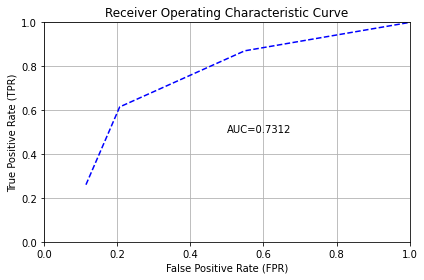

([0.11452991452991453, 0.20683760683760682, 0.5487179487179488, 1.0],
 [0.26022727272727275, 0.6147727272727272, 0.8704545454545455, 1.0])

In [ ]:
#3. ROC 
best_rf_perf1.plot(type='roc')